In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import  DataLoader

print("GPU available :{}".format(torch.cuda.is_available()))

GPU available :True


In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else :
    device = 'cpu'    

In [3]:
transfomer = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5,))])

In [4]:
train_dataset = torchvision.datasets.MNIST('mnist',
                                          train = True,
                                          download = True,
                                          transform = transfomer)
test_dataset = torchvision.datasets.MNIST('mnist',
                                          train = False,
                                          download = True,
                                          transform = transfomer)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw



In [5]:
print(train_dataset.data.shape)
print(test_dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### **we can plot this in OpenCV**


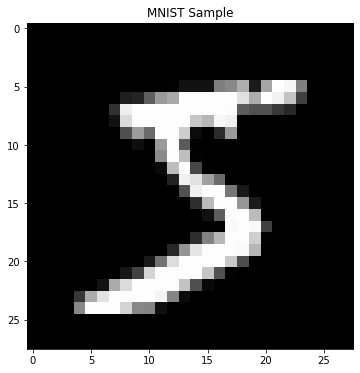

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Convert image to a numpy array
image = train_dataset.data[0].numpy()
imgshow("MNIST Sample", image)

### **Alternatively we can use matplotlib to show many examples from our dataset**

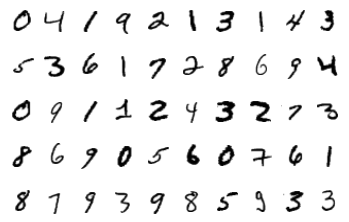

In [8]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50 

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(train_dataset.data[index], cmap='gray_r')

In [10]:
trainloader = DataLoader(train_dataset, batch_size = 128, shuffle=True, num_workers=0)
testloader = DataLoader(test_dataset, batch_size = 128, shuffle=True, num_workers=0)

In [11]:
class MNISTClissifier(nn.Module):
    def __init__(self):
        super(MNISTClissifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.maxPool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64* 12*12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.maxPool(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [12]:
net = MNISTClissifier()
net.to(device)

MNISTClissifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum= 0.9)

In [14]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []


for epoch in range(epochs):


    print(f'start epoch number : {epoch +1}')

    running_loss = 0.0


    for i , data in enumerate(trainloader, 0):

        inputs, labels = data
        

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 50 == 49:
            correct = 0
            total = 0


            with torch.no_grad():
                for data in testloader:
                    images, labels = data

                    images = images.to(device)
                    labels =labels.to(device)    

                    outputs = net(images)

                    _, prediction = torch.max(outputs.data, dim= 1)

                    total += labels.size(0)

                    correct += (prediction ==labels).sum().item()

                accuracy = (correct/total) * 100
                epoch_num = epoch + 1
                actual_loss = running_loss/50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')

    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('finish Training')    

start epoch number : 1
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.274, Test Accuracy = 37.500%
Epoch: 1, Mini-Batches Completed: 100, Loss: 4.437, Test Accuracy = 55.530%
Epoch: 1, Mini-Batches Completed: 150, Loss: 6.305, Test Accuracy = 72.050%
Epoch: 1, Mini-Batches Completed: 200, Loss: 7.495, Test Accuracy = 81.870%
Epoch: 1, Mini-Batches Completed: 250, Loss: 8.165, Test Accuracy = 85.630%
Epoch: 1, Mini-Batches Completed: 300, Loss: 8.667, Test Accuracy = 88.130%
Epoch: 1, Mini-Batches Completed: 350, Loss: 9.100, Test Accuracy = 88.970%
Epoch: 1, Mini-Batches Completed: 400, Loss: 9.506, Test Accuracy = 89.750%
Epoch: 1, Mini-Batches Completed: 450, Loss: 9.867, Test Accuracy = 90.190%
start epoch number : 2
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.353, Test Accuracy = 90.330%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.667, Test Accuracy = 91.100%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.986, Test Accuracy = 90.650%
Epoch: 2, Mini-Batches Completed: 200, Loss:

### **Let's reload the model we just saved**

In [15]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

### **Let's look at some images from your Test Data and view their Ground Truth labels**

In [ ]:

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

### **Let's reload the model we just saved**

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

#### **Getting Predictions**


In [ ]:

test_iter = iter(testloader)


images, labels = test_iter.next()


images = images.to(device)
labels = labels.to(device)

outputs = net(images)


_, predicted = torch.max(outputs, 1)


print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

#### **Showing our Test Accuracy again**

In [ ]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

## **Plotting our Training Logs**


In [ ]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()